# Case Study 1.1.1: Genetic Codes

* Case Study Description: Using K-means to help figure out that DNA is composed of 3-letter words.

* Self-Help Documentation: From this document, you will learn how data visualization can help in genomic sequence analysis and start with a fragment of genetic text of a bacterial genome and analyze its structure.

https://courses.xpro.mit.edu/assets/courseware/v1/d0daa2284f14b678a80715621898d467/asset-v1:xPRO+DSx+R13+type@asset+block/14MainGorbanKeglWunschZin.pdf

* Time Required: The time required to do this activity varies depending on your experience in the required programming background. We suggest planning somewhere between 1 & 3 hours. Remember, this is an optional activity for participants looking for hands-on experience.

In [80]:
from urllib.request import urlopen
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
url = "http://www.ihes.fr/~zinovyev/pcadg/ccrescentus.fa"
response = urlopen(url) 
txt = response.read().decode("utf-8", "ignore")[34:].replace('\r\n','')

In [76]:
txt

'gccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaaggcgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgagggcgaagggttggacgagaacttgctgcggtagctgccgtcatagccgacatagaactcgcccgtcttgcccaggaagtcgcccggaacattggcctcggcccccagggccacgctccacttcgaaacgcccggcagccgctgacccgagacgtcgcagttggcggggctgagcgcgccggccacgccggccgcgcgcggaacctgggttccggtcgccaccgtgccgcccgacagttccggcgggcagggcgcgtcgacaaagcgcacatacttggcgtcggtataggcggcgttcagataggtcgagaagcgggcgttcgggcgataggccgagtccagctccacgccttgggtgcgcaccttgccggcgttggccagatagccgcgcagcacgcccagctggccgttgctcaccgtggcctggtagttcttgatgtcgctgcggaacaccgcaaggttggccgtcagggtgcggtccagccactgggtcttcaggccgccctcgaagtgattgatgtcctcgggcttgatcgcgcctgcggcctcgatcggcttgcccgccgcatcggtcggcaggccgttctggttgatgccgccggtcttgaagctcttggcgtaggtggcgtaggccaggacgtcacggtccagctggtagcttgccgacaggtcgtaggtgaagttccagtcgtcgaagctggg

In [191]:
import re
from itertools import product

n_codons=1
count_row=0
words_len=300

headers_perm=[''.join(p) for p in product('acgt', repeat=n_codons)]
data=pd.DataFrame(columns=headers_perm)


for interval in range(0,len(txt),words_len):
    gen=re.sub('(.{1})', '\\1 ',txt[interval:interval+300]).split()

    wfreq=[]
    for perm in headers_perm:
        wfreq.append(gen.count(perm))
    data.loc[count_row]=wfreq
    count_row+=1
df_1=data
df_1

,a,c,g,t
0,54,93,104,49
1,51,104,102,43
2,36,97,106,61
3,46,87,112,55
4,48,82,105,65
...,...,...,...,...
1013,43,91,93,73
1014,41,83,99,77
1015,35,103,89,73
1016,59,96,91,54


In [192]:
import re
from itertools import product

n_codons=2
count_row=0
words_len=300

headers_perm=[''.join(p) for p in product('acgt', repeat=n_codons)]
data=pd.DataFrame(columns=headers_perm)


for interval in range(0,len(txt),words_len):
    gen=re.sub('(.{2})', '\\1 ',txt[interval:interval+300]).split()

    wfreq=[]
    for perm in headers_perm:
        wfreq.append(gen.count(perm))
    data.loc[count_row]=wfreq
    count_row+=1
df_2=data
df_2

,aa,ac,ag,at,ca,cc,cg,ct,ga,gc,gg,gt,ta,tc,tg,tt
0,6,6,17,6,6,21,10,3,4,16,20,11,3,10,6,5
1,7,6,8,2,12,17,19,7,5,22,17,8,4,4,6,6
2,0,5,11,5,6,14,19,5,8,21,14,7,1,13,12,9
3,4,7,10,0,9,9,18,9,6,20,17,11,6,6,13,5
4,3,5,14,4,7,10,12,11,12,16,14,8,0,11,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,4,5,6,6,10,12,14,11,6,16,13,10,2,11,15,9
1014,4,2,8,6,4,9,17,10,8,20,16,5,5,12,9,15
1015,1,5,5,5,8,9,17,16,6,21,14,8,4,18,4,9
1016,8,12,6,8,7,15,20,2,9,11,13,6,1,14,13,5


In [193]:
import re
from itertools import product

n_codons=3
count_row=0
words_len=300

headers_perm=[''.join(p) for p in product('acgt', repeat=n_codons)]
data=pd.DataFrame(columns=headers_perm)


for interval in range(0,len(txt),words_len):
    gen=re.sub('(.{3})', '\\1 ',txt[interval:interval+300]).split()

    wfreq=[]
    for perm in headers_perm:
        wfreq.append(gen.count(perm))
    data.loc[count_row]=wfreq
    count_row+=1
df_3=data
df_3

,aaa,aac,aag,aat,aca,acc,acg,act,aga,agc,...,tcg,tct,tga,tgc,tgg,tgt,tta,ttc,ttg,ttt
0,0,3,1,0,0,1,0,0,0,2,...,0,0,1,0,2,0,0,0,1,1
1,1,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1,0,2,1,1,2,1,0,1,4,...,2,1,1,1,2,1,0,1,7,0
1014,0,0,1,0,0,2,3,0,1,1,...,2,0,0,0,0,0,0,3,8,0
1015,0,0,2,0,1,1,1,0,1,1,...,1,1,1,2,2,0,0,2,2,2
1016,2,2,1,0,5,2,2,2,3,1,...,6,0,5,7,3,1,0,1,0,1


In [194]:
import re
from itertools import product

n_codons=4
count_row=0
words_len=300

headers_perm=[''.join(p) for p in product('acgt', repeat=n_codons)]
data=pd.DataFrame(columns=headers_perm)


for interval in range(0,len(txt),words_len):
    gen=re.sub('(.{4})', '\\1 ',txt[interval:interval+300]).split()

    wfreq=[]
    for perm in headers_perm:
        wfreq.append(gen.count(perm))
    data.loc[count_row]=wfreq
    count_row+=1
df_4=data
df_4

,aaaa,aaac,aaag,aaat,aaca,aacc,aacg,aact,aaga,aagc,...,ttcg,ttct,ttga,ttgc,ttgg,ttgt,ttta,tttc,tttg,tttt
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,2,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1014,0,0,1,0,0,0,1,0,0,0,...,2,1,1,0,3,0,0,1,1,0
1015,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1016,1,0,0,0,1,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [196]:
from sklearn.preprocessing import StandardScaler
data_scaled_1 = StandardScaler().fit_transform(df_1)
data_scaled_2 = StandardScaler().fit_transform(df_2)
data_scaled_3 = StandardScaler().fit_transform(df_3)
data_scaled_4 = StandardScaler().fit_transform(df_4)

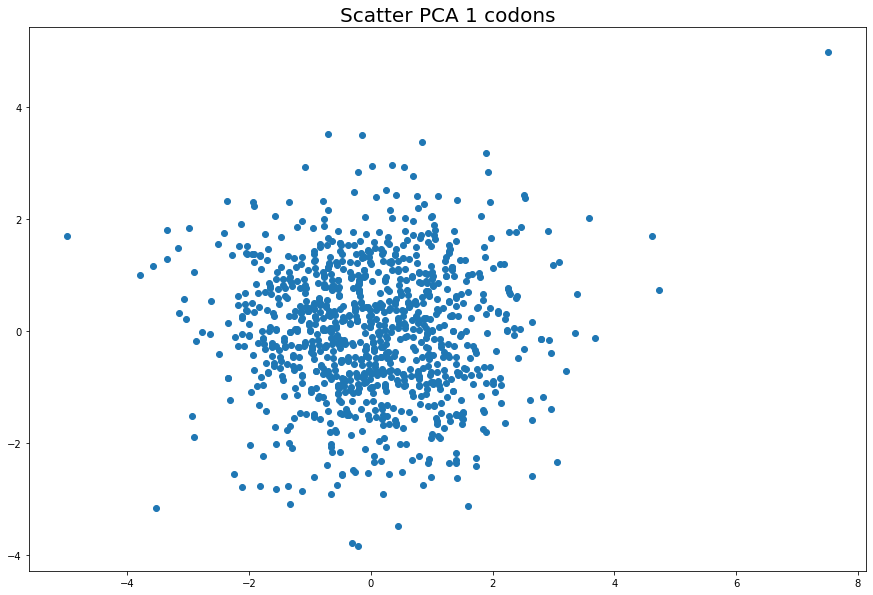

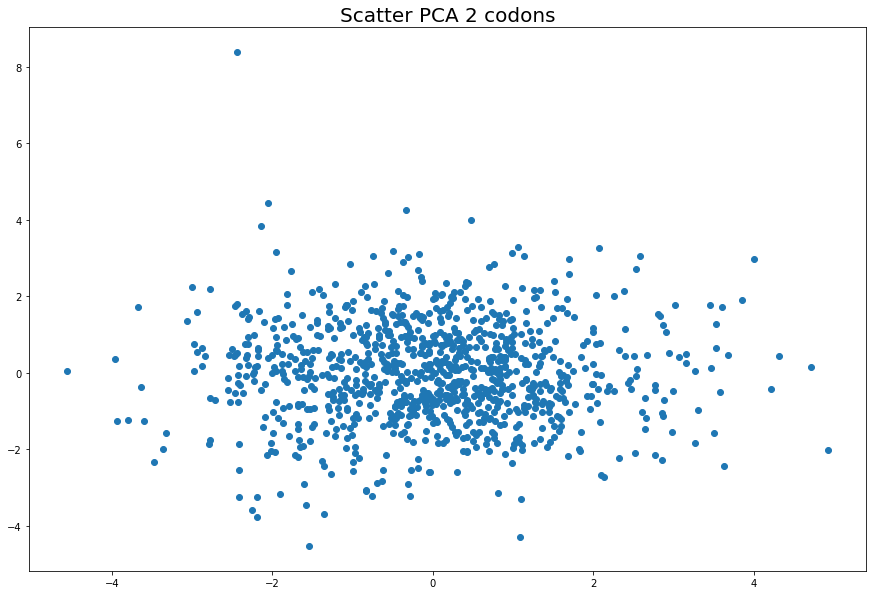

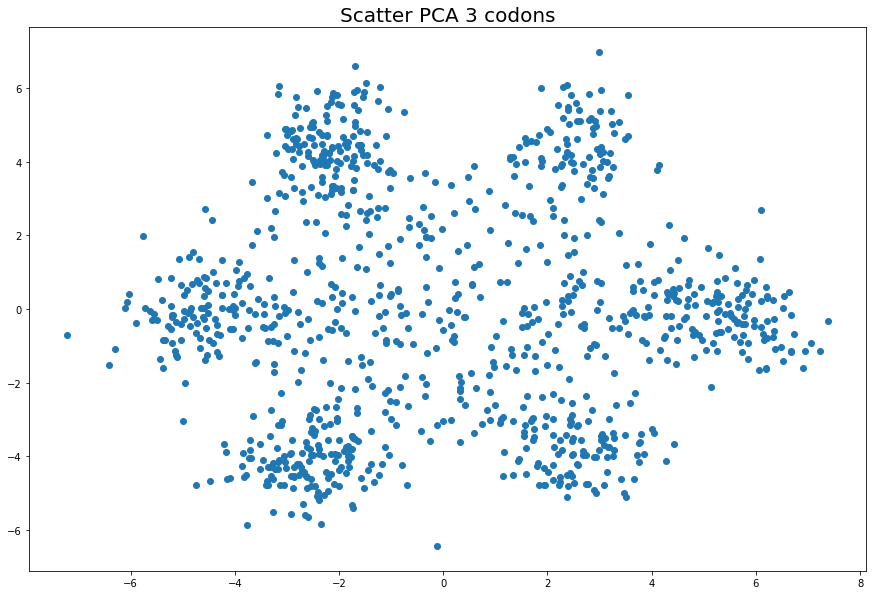

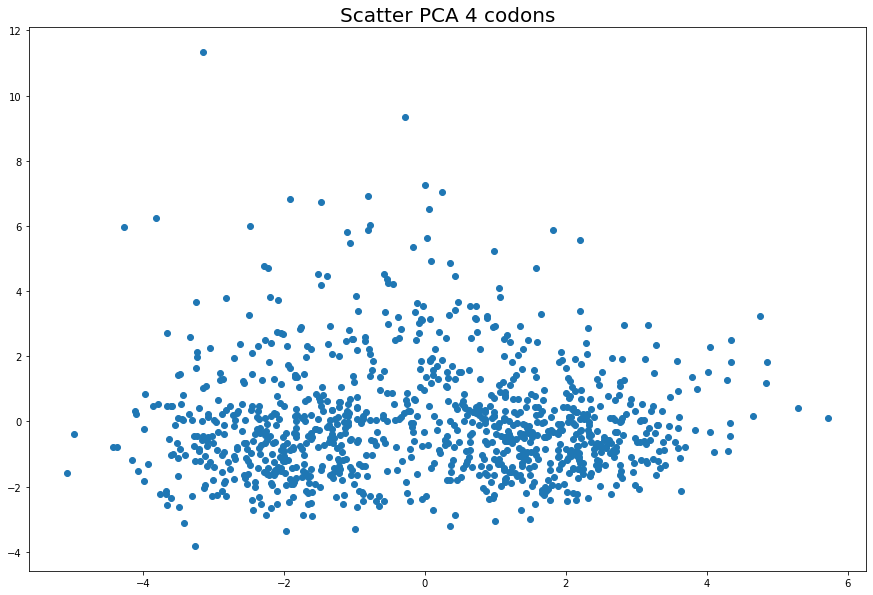

In [233]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Transform the scaled data using the PCA fit above
for i in range(1,5):
    if i==1:
        data=data_scaled_1
    elif i==2:
        data=data_scaled_2
    elif i==3:
        data=data_scaled_3
    else:
        data=data_scaled_4
        
    pca = PCA(n_components=2 ,random_state=2).fit(data).transform(data)
    plt.figure(figsize=(15,10))
    plt.scatter(pca[:,0], pca[:,1])
    plt.title('Scatter PCA '+str(i)+' codons',fontsize=20)
    plt.show()

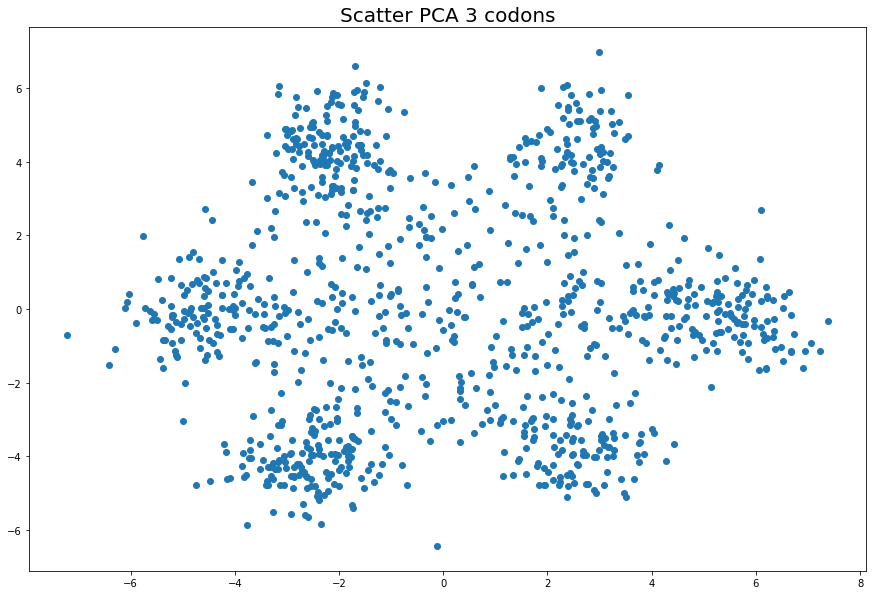

K-means score:  0.5426067388886062


Text(0.5, 1.0, 'Scatter k-menas')

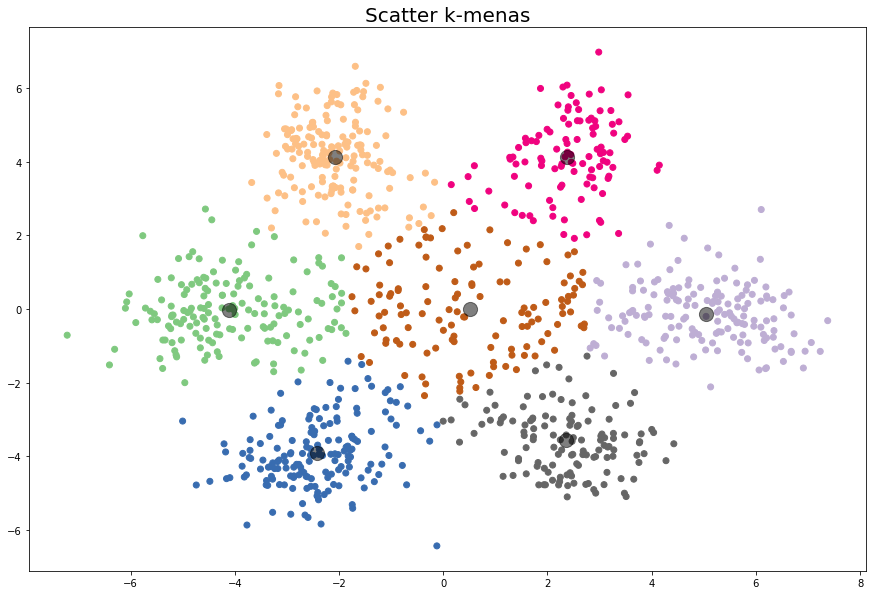

In [257]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca = PCA(n_components=2 ,random_state=2).fit(data_scaled_3).transform(data_scaled_3)
plt.figure(figsize=(15,10))
plt.scatter(pca[:,0], pca[:,1])
plt.title('Scatter PCA 3 codons',fontsize=20)
plt.show()

n_clusters = 7

clusterer = KMeans(n_clusters = n_clusters, random_state=42).fit(pca)
#Predict the cluster for each data point
preds = clusterer.predict(pca)

#Find the cluster centers
centers = clusterer.cluster_centers_

#Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(pca, clusterer.labels_, metric='euclidean')
print ("K-means score: ", score)


plt.figure(figsize=(15,10))
plt.scatter(pca[:,0], pca[:,1], c = sample_preds, cmap = 'Accent')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Scatter k-menas',fontsize=20)